# Zillow Exploration Exercises

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

In [1]:
# imports
import wrangle_zillow
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats


In [3]:
# get data
zillow = wrangle_zillow.wrangle_zillow(0.6, 0.8)
zillow

/Users/sostew/codeup-data-science/clustering-exercises/wrangle_zillow.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zillow_filt = zillow_filt[(zillow.bathroomcnt > 0) & (zillow.calculatedfinishedsquarefeet > 300)]


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,transactiondate
0,3.5,4.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,0.0,1998.0,1023282.0,0.025595,2017-01-01
1,1.0,2.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,5.0,1967.0,464000.0,0.055619,2017-01-01
2,2.0,3.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,6.0,1962.0,564778.0,0.005383,2017-01-01
3,3.0,4.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,0.0,1970.0,145143.0,-0.103410,2017-01-01
4,3.0,3.0,1312.0,6037.0,3.0,34185120.0,-118414640.0,0.0,1964.0,119407.0,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
77375,3.0,3.0,1741.0,6037.0,3.0,34202400.0,-118502000.0,0.0,1980.0,379000.0,-0.002245,2017-09-20
77376,2.0,2.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,0.0,1940.0,354621.0,0.020615,2017-09-20
77377,2.0,4.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,7.0,1964.0,67205.0,0.013209,2017-09-21
77378,1.0,3.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,0.0,1954.0,49546.0,0.037129,2017-09-21


#### Question 1: What are the individual distributions of the features?

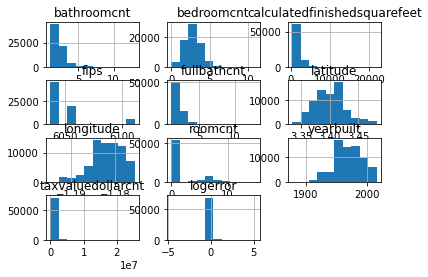

In [10]:
# view individual distributions of features
zillow.hist();

#### Answer 1:
- `bedroomcnt`, `yearbuilt` are normally distributed.
- There are outliers in `calculatedfinishedsquarefeet`, `bathroomcnt`, `bedroomcnt`, `fullbathcnt`, `roomcnt`, `taxvaluedollarcnt`, and `logerror`.
- `taxvaluedollarcnt` has the biggest outlier problem
- Data needs to be scaled

Before moving onto further exploration, I will split the data.

In [12]:
# function to split data
def split_data(df):
    '''
    This function takes in a dataframe and splits it into three dataframes.
    It returns these dataframes in this order: train, validate, test.
    Train makes up 56% of the total observations, validate 24%, and test 20%.
    '''
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train, test_size=0.3, random_state=123)
    return train, validate, test
# split data
train, validate, test = split_data(zillow)
# preview train
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,transactiondate
7100,3.0,4.0,2554.0,6037.0,3.0,34264369.0,-118552922.0,0.0,1974.0,159036.0,-0.015063,2017-02-01
51625,1.0,2.0,908.0,6037.0,1.0,33756137.0,-118133995.0,0.0,1939.0,648788.0,0.016101,2017-06-29
52487,3.0,2.0,2104.0,6037.0,3.0,34089942.0,-118451583.0,0.0,1963.0,1800000.0,0.045932,2017-06-30
42378,3.0,5.0,3925.0,6037.0,3.0,34080798.0,-118478171.0,0.0,1963.0,758151.0,0.085372,2017-06-01
12784,2.5,4.0,1890.0,6059.0,2.0,33551059.0,-117726705.0,0.0,1996.0,418776.0,-0.050413,2017-02-27


In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,39975.0,2.268218e+00,0.943190,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.300000e+01
bedroomcnt,39975.0,3.007930e+00,1.017662,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
calculatedfinishedsquarefeet,39975.0,1.754691e+03,938.017085,3.430000e+02,1.166000e+03,1.512000e+03,2.073500e+03,2.192900e+04
fips,39975.0,6.049271e+03,20.848202,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbathcnt,39975.0,2.197073e+00,0.923358,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.300000e+01
latitude,39975.0,3.400571e+07,268493.349611,3.333953e+07,3.380553e+07,3.401950e+07,3.417650e+07,3.481877e+07
longitude,39975.0,-1.181978e+08,362284.274155,-1.194754e+08,-1.184171e+08,-1.181708e+08,-1.179175e+08,-1.175546e+08
roomcnt,39975.0,1.574334e+00,2.900205,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
yearbuilt,39975.0,1.969300e+03,23.251278,1.878000e+03,1.954000e+03,1.970000e+03,1.987000e+03,2.016000e+03
taxvaluedollarcnt,39975.0,4.877464e+05,600423.491500,1.000000e+03,2.052805e+05,3.590000e+05,5.695100e+05,2.434570e+07


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39975 entries, 7100 to 56311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   39975 non-null  float64
 1   bedroomcnt                    39975 non-null  float64
 2   calculatedfinishedsquarefeet  39975 non-null  float64
 3   fips                          39975 non-null  float64
 4   fullbathcnt                   39975 non-null  float64
 5   latitude                      39975 non-null  float64
 6   longitude                     39975 non-null  float64
 7   roomcnt                       39975 non-null  float64
 8   yearbuilt                     39975 non-null  float64
 9   taxvaluedollarcnt             39975 non-null  float64
 10  logerror                      39975 non-null  float64
 11  transactiondate               39975 non-null  object 
dtypes: float64(11), object(1)
memory usage: 4.0+ MB
